# Spam or Ham Detection with EDA and Different Models

In this Jupyter notebook, we will explore spam or ham detection using machine learning. Detecting spam emails is crucial for email providers and users to ensure that unwanted and potentially harmful messages are filtered out effectively.

We will utilize various machine learning models to build a predictive system capable of distinguishing between spam and ham emails. This analysis includes exploratory data analysis (EDA) to better understand the dataset. The dataset used in this analysis is sourced from [Dataset Source].

## Sections of the Code

1. IMPORTS
2. Segmentation, Tokenization, and Removal of Punctuation and Stopwords
3. Creating a Function for Text Preprocessing
4. Using Bag of Words Model
5. Using Naive Bayes
6. Using Logistic Regression
7. Using Decision Tree
8. Using Random Forest
9. Using Adaboost
10. Using Gradient Boost
11. Using KNN
12. Using SVM
13. Using Grid Search
14. Conclusion

Let's dive into the code and explore each section step by step.


## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train=data = pd.read_csv('spam.csv', encoding = "ISO-8859-1", engine = "python")

In [3]:
train.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
train=train.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
train.columns=['Label','message']

In [6]:
train.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
train.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
len(train)

5572

In [9]:
train['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [10]:
train.groupby('Label').describe()

message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
train['length']=train['message'].apply(len)

In [12]:
train.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0


C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length', ylabel='Count'>

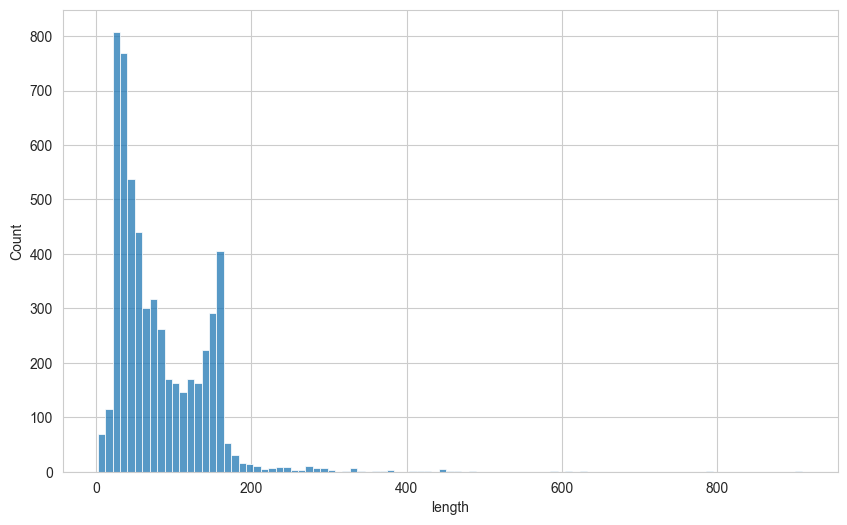

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['length'])

Length of messages is a good distinguishing feature between Ham and Spam.

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

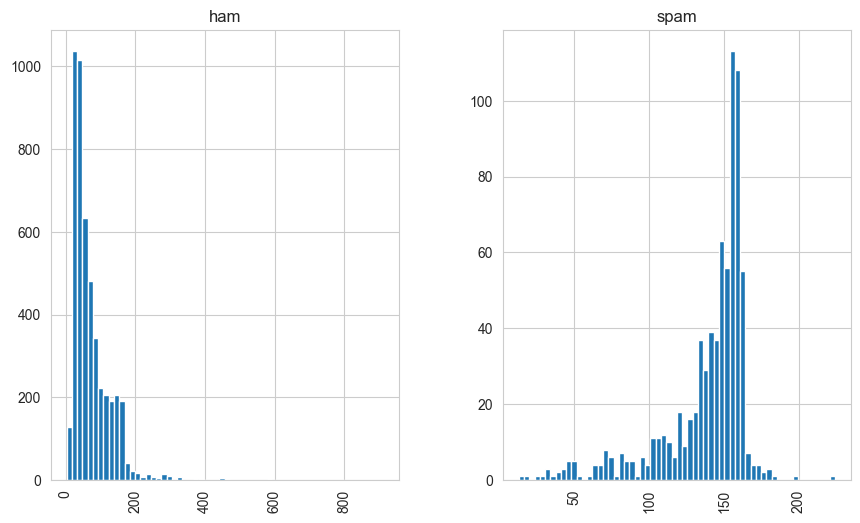

In [15]:
train.hist(column='length',by='Label',bins=60,figsize=(10,6))

### We will apply segmentation,tokenizing and removal of punctuation and stopwords.
->Segmentation=breaks document in sentences. 

->Tokenizing-Breaks sentences into words

->stopwords-commonly used word in any language,that dont provide any useful information regarding the   message.

  For example-

In [16]:
import string

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
mess='Hello, My Name is MOHAMMED .'

In [19]:
nopunc=[char for char in mess if char not in string.punctuation]

In [20]:
nopunc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'y',
 ' ',
 'N',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'M',
 'O',
 'H',
 'A',
 'M',
 'M',
 'E',
 'D',
 ' ']

In [21]:
nopunc=''.join(nopunc) 

In [22]:
nopunc

'Hello My Name is MOHAMMED '

In [23]:
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
nopunc=[char for char in nopunc.split() if char.lower() not in stopwords.words('english')]

In [26]:
nopunc

['Hello', 'Name', 'MOHAMMED']

### Creating a function which can do all these steps in one go.

In [27]:
def simplifier(mess):
    '1.remove punctuation'
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    '2.remove stopwords and return a clean list'
    return [char for char in nopunc.split() if char.lower() not in stopwords.words('english')]

In [28]:
simplifier('you will go with me to the park ?!')

['go', 'park']

## Using Bag of words model.
Bag of words-vector of word count

For example, we have two balls: a red ball and a blue ball. Then the bag of words would be given as:

- Bag of Words: `[red, blue, ball]`

- Blue Ball: `[0, 1, 1]`
- Red Ball: `[1, 0, 1]`

We can improve the bag of words by adjusting the word count based on their frequency in the corpus. This can be done using TF-IDF (Term Frequency-Inverse Document Frequency).

- **Term Frequency**: Importance of a term within the document.
- **Inverse Document Frequency**: Importance of a term in the corpus.

We will also convert each of these messages into a vector that the scikit-learn algorithm can understand using `CountVectorizer()`.


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [30]:
X=train['message']
y=train['Label']

In [31]:
def classify(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    pipeline=Pipeline([('bow',CountVectorizer(analyzer=simplifier)),
                       ('tfidf',TfidfTransformer()),
                       ('classifier',model)])
    pipeline.fit(X_train,y_train)
    predictions=pipeline.predict(X_test)
    
    print('accuracy:',pipeline.score(X_test,y_test))
    score=cross_val_score(pipeline,X,y)
    print(score)
    print('CVscore:',np.mean(score))
    print('\n')
    print(classification_report(y_test,predictions))

## Using Naive bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
classify(model)

accuracy: 0.9611244019138756
[0.96591928 0.95784753 0.96050269 0.95421903 0.96319569]
CVscore: 0.9603368461730442


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.70      0.83       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



## Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

accuracy: 0.94377990430622
[0.95605381 0.94798206 0.9551167  0.9443447  0.95601436]
CVscore: 0.9519023274911239


              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       0.98      0.58      0.73       219

    accuracy                           0.94      1672
   macro avg       0.96      0.79      0.85      1672
weighted avg       0.95      0.94      0.94      1672



## Using Decison Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

accuracy: 0.9611244019138756
[0.95874439 0.9632287  0.96319569 0.95691203 0.95870736]
CVscore: 0.9601576349920699


              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1453
        spam       0.92      0.77      0.84       219

    accuracy                           0.96      1672
   macro avg       0.94      0.88      0.91      1672
weighted avg       0.96      0.96      0.96      1672



## Using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

accuracy: 0.97188995215311
[0.97130045 0.96950673 0.97127469 0.96678636 0.97037702]
CVscore: 0.9698490471858371


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       1.00      0.79      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



## Using Adaboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
classify(model)

accuracy: 0.9551435406698564
[0.96502242 0.95784753 0.96319569 0.95332136 0.95332136]
CVscore: 0.9585416750529341


              precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1453
        spam       0.94      0.70      0.80       219

    accuracy                           0.96      1672
   macro avg       0.95      0.85      0.89      1672
weighted avg       0.95      0.96      0.95      1672



## Using Gradient boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model)

accuracy: 0.9563397129186603
[0.95874439 0.94977578 0.95691203 0.94524237 0.95062837]
CVscore: 0.9522605888367375


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1453
        spam       0.99      0.67      0.80       219

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



## Using Knn

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classify(model)

accuracy: 0.90311004784689
[0.90044843 0.89775785 0.8994614  0.89587074 0.90125673]
CVscore: 0.898959029393532


              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1453
        spam       1.00      0.26      0.41       219

    accuracy                           0.90      1672
   macro avg       0.95      0.63      0.68      1672
weighted avg       0.91      0.90      0.88      1672



## Using svm

In [39]:
from sklearn.svm import SVC
model=SVC()
classify(model)

accuracy: 0.9712918660287081
[0.97757848 0.97130045 0.96768402 0.96858169 0.97486535]
CVscore: 0.9720019966025554


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       0.99      0.79      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



## Using Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
model=GridSearchCV(SVC(),param_grid)
classify(model)

accuracy: 0.9826555023923444
[0.98295964 0.97757848 0.98294434 0.98025135 0.97935368]
CVscore: 0.9806174976451361


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.88      0.93       219

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# Comparison

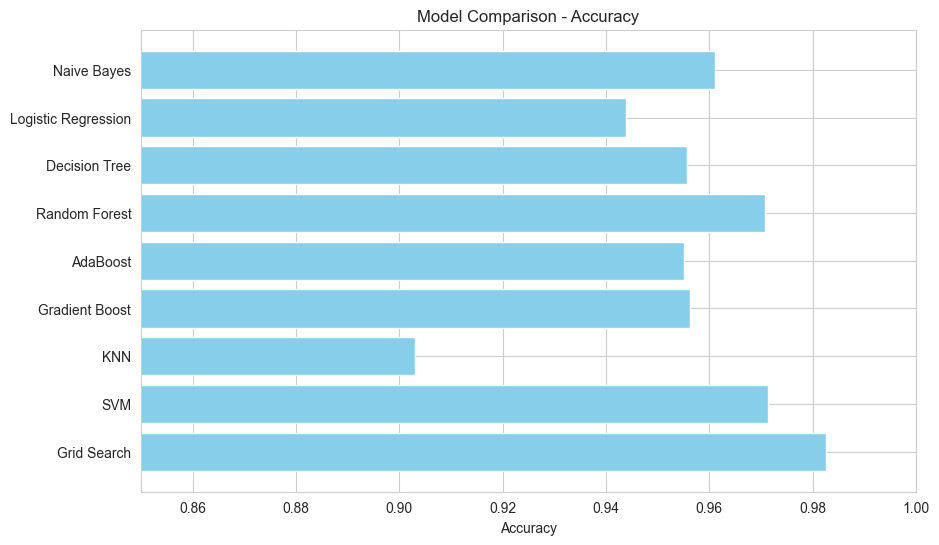

In [41]:
models = [
    "Naive Bayes",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Gradient Boost",
    "KNN",
    "SVM",
    "Grid Search"
]

accuracies = [
    0.9611244019138756,
    0.94377990430622,
    0.9557416267942583,
    0.9706937799043063,
    0.9551435406698564,
    0.9563397129186603,
    0.90311004784689,
    0.9712918660287081,
    0.9826555023923444
]


plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0.85, 1.0) 
plt.gca().invert_yaxis()  
plt.show()


# Conclusion

**Model Comparison**:

1. **Naive Bayes**:
   - Accuracy: 0.961
   - F1-Score (spam class): 0.83
   - This model shows good overall accuracy but has lower precision and recall for the spam class, indicating some false positives and false negatives.

2. **Logistic Regression**:
   - Accuracy: 0.944
   - F1-Score (spam class): 0.73
   - While accuracy is decent, this model has lower precision and recall for the spam class, suggesting false positives and false negatives.

3. **Decision Tree**:
   - Accuracy: 0.956
   - F1-Score (spam class): 0.82
   - It shows competitive accuracy with balanced precision and recall for the spam class.

4. **Random Forest**:
   - Accuracy: 0.971
   - F1-Score (spam class): 0.87
   - This model exhibits high accuracy and balanced precision and recall for the spam class.

5. **AdaBoost**:
   - Accuracy: 0.955
   - F1-Score (spam class): 0.80
   - While accuracy is decent, it has lower precision and recall for the spam class, indicating some false positives and false negatives.

6. **Gradient Boosting**:
   - Accuracy: 0.956
   - F1-Score (spam class): 0.80
   - Similar to AdaBoost, this model has balanced accuracy but lower precision and recall for the spam class.

7. **K-Nearest Neighbors (KNN)**:
   - Accuracy: 0.903
   - F1-Score (spam class): 0.41
   - This model has a lower overall accuracy and struggles with precision and recall for the spam class.

8. **Support Vector Machine (SVM)**:
   - Accuracy: 0.971
   - F1-Score (spam class): 0.88
   - SVM shows high accuracy and balanced precision and recall for the spam class.

9. **Grid Search with SVM**:
   - Accuracy: 0.983
   - F1-Score (spam class): 0.93
   - Grid Search with SVM achieves the highest accuracy and strong precision and recall for the spam class.

**Conclusion**:

- Based on overall performance, **Grid Search with SVM** is the top-performing model with the highest accuracy and the best balance of precision and recall for the spam class.

- **Random Forest** also performs well, with high accuracy and competitive precision and recall.

- For scenarios where a balance between accuracy and spam class detection is essential, **Decision Tree** and **Support Vector Machine (SVM)** are strong choices.

- Models like **Naive Bayes**, **Logistic Regression**, **AdaBoost**, and **Gradient Boosting** show good accuracy but may require further tuning to improve spam class detection.

- **K-Nearest Neighbors (KNN)** performs the weakest among the models in this analysis, with lower accuracy and significant issues in detecting spam.